# Nelaturi_MahemaReddy_HW6

##### Name: Nelaturi Mahema Reddy
##### Github Username: mahemareddy
##### USC ID: 2814429305

## 1. Tree-Based Methods

In [1]:
import pandas as pd

import matplotlib.pyplot as plt                       
import seaborn as sns
import numpy as np

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import glob
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

import numpy as np
import scipy.stats as st

from sklearn.metrics import RocCurveDisplay

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso
import statsmodels.api as sm
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import warnings
warnings.filterwarnings("ignore")

### (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [2]:
train_data = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20)

In [3]:
test_data= pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20)

In [4]:
train_data

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995   neg  153002     na         664    186      0      0      0      0   
59996   neg    2286     na  2130706538    224      0      0      0      0   
59997   neg     112      0  2130706432     18      0      0      0      0   
59998   neg   80292     na  2130706432    494      0      0      0      0   
59999   neg   40222     na         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384   721044   469792   339156  157956   73224   
1          0  ...   421400  178064   293306   245416   133654   81140   97576   
2          0  ...   277378  159812   423992   409564   320746  158022   95128   
3          0  ...      240      46       58       44       10       0       0   
4          0  ...   622012  229790   405298   347188   286954  311560  433954   
...      ...  ...      ...     ...      ...      ...      ...     ...     ...   
59995      0  ...   998500  566884  1290398  1218244  1019768  717762  898642   
59996      0  ...    10578    6760    21126    68424      136       0       0   
59997      0  ...      792     386      452      144      146    2622       0   
59998      0  ...   699352  222654   347378   225724   194440  165070  802280   
59999      0  ...   440066  183200   344546   254068   225148  158304  170384   

       ee_009 ef_000 eg_000  
0           0      0      0  
1        1500      0      0  
2         514      0      0  
3           0      4     32  
4        1218      0      0  
...       ...    ...    ...  
59995   28588      0      0  
59996       0      0      0  
59997       0      0      0  
59998  388422      0      0  
59999     158      0      0  

[60000 rows x 171 columns]

In [5]:
test_data

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg      60      0          20     12      0      0      0      0   
1       neg      82      0          68     40      0      0      0      0   
2       neg   66002      2         212    112      0      0      0      0   
3       neg   59816     na        1010    936      0      0      0      0   
4       neg    1814     na         156    140      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
15995   neg   81852     na  2130706432    892      0      0      0      0   
15996   neg      18      0          52     46      8     26      0      0   
15997   neg   79636     na        1670   1518      0      0      0      0   
15998   neg     110     na          36     32      0      0      0      0   
15999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008  \
0          0  ...    1098     138     412     654       78      88       0   
1          0  ...    1068     276    1620     116       86     462       0   
2          0  ...  495076  380368  440134  269556  1315022  153680     516   
3          0  ...  540820  243270  483302  485332   431376  210074  281662   
4          0  ...    7646    4144   18466   49782     3176     482      76   
...      ...  ...     ...     ...     ...     ...      ...     ...     ...   
15995      0  ...  632658  273242  510354  373918   349840  317840  960024   
15996      0  ...     266      44      46      14        2       0       0   
15997      0  ...  806832  449962  778826  581558   375498  222866  358934   
15998      0  ...     588     210     180     544     1004    1338      74   
15999      0  ...      46      10      48      14       42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1          0      0      0  
2          0      0      0  
3       3232      0      0  
4          0      0      0  
...      ...    ...    ...  
15995  25566      0      0  
15996      0      0      0  
15997  19548      0      0  
15998      0      0      0  
15999      0      0      0  

[16000 rows x 171 columns]

### (b) Data Preparation

### i. Research what types of techniques are usually used for dealing with data with missing values. 2 Pick at least one of them and apply it to this data in the next steps.

Some of the imputation techniques are:
- Univariate vs Multivariate Imputation
- Univariate feature imputation
- Multivariate feature imputation
- Nearest neighbors imputation
- Marking imputed values
- Estimators that handle NaN values

The data that we are dealing with is univariate data, the generic way to impute missing values for such kind of data is to use one of mean, median, etc. I will be making use of the mean to perform imputation for the missing data.

In [6]:
train_data.replace('na', np.nan, inplace=True)

In [7]:
test_data.replace('na', np.nan, inplace=True)

In [8]:
train_data.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [9]:
full_dataset = pd.concat([train_data, test_data],ignore_index=True)

In [10]:
full_dataset

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698    NaN  2130706438    280      0      0      0      0   
1       neg   33058    NaN           0    NaN      0      0      0      0   
2       neg   41040    NaN         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874    NaN        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995   neg   81852    NaN  2130706432    892      0      0      0      0   
75996   neg      18      0          52     46      8     26      0      0   
75997   neg   79636    NaN        1670   1518      0      0      0      0   
75998   neg     110    NaN          36     32      0      0      0      0   
75999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384  721044  469792  339156  157956   73224   
1          0  ...   421400  178064  293306  245416  133654   81140   97576   
2          0  ...   277378  159812  423992  409564  320746  158022   95128   
3          0  ...      240      46      58      44      10       0       0   
4          0  ...   622012  229790  405298  347188  286954  311560  433954   
...      ...  ...      ...     ...     ...     ...     ...     ...     ...   
75995      0  ...   632658  273242  510354  373918  349840  317840  960024   
75996      0  ...      266      44      46      14       2       0       0   
75997      0  ...   806832  449962  778826  581558  375498  222866  358934   
75998      0  ...      588     210     180     544    1004    1338      74   
75999      0  ...       46      10      48      14      42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1       1500      0      0  
2        514      0      0  
3          0      4     32  
4       1218      0      0  
...      ...    ...    ...  
75995  25566      0      0  
75996      0      0      0  
75997  19548      0      0  
75998      0      0      0  
75999      0      0      0  

[76000 rows x 171 columns]

In [11]:
full_dataset['class'].value_counts()['pos']

1375

In [12]:
full_dataset['class'].value_counts()['neg']

74625

In [13]:
full_dataset_X = full_dataset.drop(columns=['class'])

In [14]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(full_dataset_X)
full_dataset_X.iloc[:,:]= imputer.transform(full_dataset_X)

In [15]:
full_dataset_X.isna().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

In [16]:
full_dataset_Y = full_dataset['class']

In [17]:
full_dataset_Y = full_dataset_Y.map({'pos':1, 'neg':0})

In [18]:
full_dataset_Y

0        0
1        0
2        0
3        0
4        0
        ..
75995    0
75996    0
75997    0
75998    0
75999    0
Name: class, Length: 76000, dtype: int64

In [19]:
#Train_data_X = full_dataset_X.iloc[:60000,:]
#Test_data_X = full_dataset_X.iloc[60000:,:]
Train_data_Y = full_dataset_Y.iloc[:60000]
Test_data_Y = full_dataset_Y.iloc[60000:]


In [20]:
def get_X_Y_split(df):
    x_data = df.iloc[:, 1:]
    y_data = df.iloc[:, 0:1]
    return x_data, y_data

In [21]:
aps_train_df_x, aps_train_df_y = get_X_Y_split(train_data) 
aps_test_df_x, aps_test_df_y = get_X_Y_split(test_data)

In [22]:
from sklearn.impute import SimpleImputer

def impute(df):
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    temp1 = imputer.fit_transform(df)
    imputed_df = pd.DataFrame(temp1, columns=df.columns)
    return imputed_df

In [23]:
imputed_aps_train_df_x = impute(aps_train_df_x)
imputed_aps_test_df_x = impute(aps_test_df_x)

In [24]:
imputed_aps_train_df_x

aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0       76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1       33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2       41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3          12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4       60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...         ...       ...           ...            ...     ...     ...   
59995  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59996    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59997     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59998   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
59999   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ag_003  ...     ee_002    ee_003     ee_004  \
0         0.0     0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   
1         0.0     0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   
2         0.0     0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   
3         0.0     0.0     0.0   318.0  ...      240.0      46.0       58.0   
4         0.0     0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   
...       ...     ...     ...     ...  ...        ...       ...        ...   
59995     0.0     0.0     0.0  2564.0  ...   998500.0  566884.0  1290398.0   
59996     0.0     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0   
59997     0.0     0.0     0.0     0.0  ...      792.0     386.0      452.0   
59998     0.0     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   
59999     0.0     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   

          ee_005     ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       469792.0   339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       245416.0   133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       409564.0   320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           44.0       10.0       0.0       0.0       0.0     4.0    32.0  
4       347188.0   286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...        ...       ...       ...       ...     ...     ...  
59995  1218244.0  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996    68424.0      136.0       0.0       0.0       0.0     0.0     0.0  
59997      144.0      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   225724.0   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   254068.0   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 170 columns]

### ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [25]:
data_features = full_dataset_X.columns
data_features

Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
       'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=170)

In [26]:
cv_list=[]

for i in data_features:
    temp_list=[]
    d1=full_dataset_X[i]
    sd=d1.std()
    mn=d1.mean()
    f=round(sd/mn,3)
    temp_list.append(i)
    temp_list.append(f)
    cv_list.append(temp_list)
    

In [27]:
list_CV = []

for feature in data_features:
    temp =[]
    data= full_dataset_X[feature]
    std_dev = data.std()
    mean = data.mean()
    cv = round(std_dev/mean,3)
    temp.append(feature)
    temp.append(cv)
    list_CV.append(temp)

In [28]:
from tabulate import tabulate
print(tabulate(list_CV,headers=['Features','Coefficient of Variation(CV)']))

Features      Coefficient of Variation(CV)
----------  ------------------------------
aa_000                               4.329
ab_000                               2.178
ac_000                               2.168
ad_000                             206.721
ae_000                              22.294
af_000                              18.209
ag_000                              91.461
ag_001                              42.084
ag_002                              17.626
ag_003                               8.753
ag_004                               5.475
ag_005                               2.964
ag_006                               2.353
ag_007                               2.812
ag_008                               6.275
ag_009                              32.167
ah_000                               2.316
ai_000                              18.506
aj_000                              43.144
ak_000                              78.623
al_000                               9.112
am_0       

In [29]:
list_CV[1][1]

2.178

In [30]:
corr_matrix = full_dataset_X.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

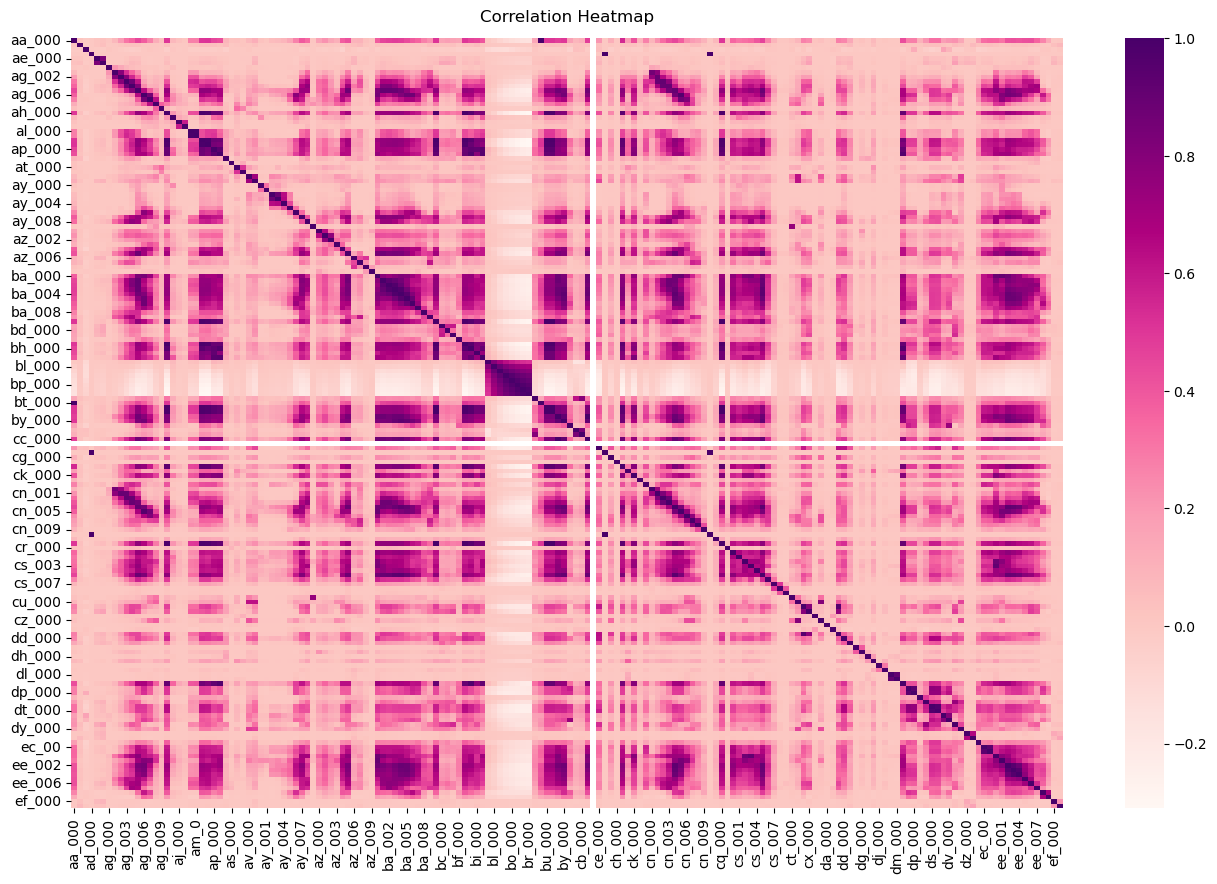

In [31]:
plt.close()
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap( full_dataset_X.corr(), cmap='RdPu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

### v. Pick √ 170 features with highest CV, and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [32]:
list_CV.sort(key= lambda x:x[1], reverse= True)
list_CV

[['cf_000', 207.27],
 ['co_000', 206.876],
 ['ad_000', 206.721],
 ['cs_009', 192.523],
 ['dj_000', 122.128],
 ['as_000', 113.883],
 ['dh_000', 112.652],
 ['df_000', 111.37],
 ['ag_000', 91.461],
 ['au_000', 86.086],
 ['ak_000', 78.623],
 ['az_009', 78.0],
 ['ay_009', 77.461],
 ['ch_000', 57.498],
 ['cs_008', 57.202],
 ['ay_001', 49.249],
 ['dz_000', 49.249],
 ['ef_000', 47.92],
 ['eg_000', 45.651],
 ['aj_000', 43.144],
 ['ag_001', 42.084],
 ['ay_000', 40.903],
 ['ay_002', 38.342],
 ['dl_000', 37.457],
 ['dk_000', 36.518],
 ['dg_000', 34.677],
 ['dm_000', 34.552],
 ['ay_004', 33.04],
 ['ea_000', 32.777],
 ['ag_009', 32.167],
 ['cn_009', 30.961],
 ['ay_003', 28.33],
 ['cy_000', 28.006],
 ['cn_000', 27.975],
 ['da_000', 25.206],
 ['at_000', 23.187],
 ['az_008', 22.415],
 ['ae_000', 22.294],
 ['dq_000', 21.185],
 ['ai_000', 18.506],
 ['af_000', 18.209],
 ['ag_002', 17.626],
 ['az_007', 15.382],
 ['cp_000', 12.919],
 ['cn_001', 12.625],
 ['cr_000', 12.471],
 ['cl_000', 12.164],
 ['az_002', 

In [33]:
sqrt=math.sqrt(170)
sqrt

13.038404810405298

In [34]:
selected_features = []
j = 0
while (j<sqrt-1):
    selected_features.append(list_CV[j][0])
    j+=1
selected_features    

['cf_000',
 'co_000',
 'ad_000',
 'cs_009',
 'dj_000',
 'as_000',
 'dh_000',
 'df_000',
 'ag_000',
 'au_000',
 'ak_000',
 'az_009',
 'ay_009']

In [35]:
selected_dataset = full_dataset_X[selected_features]

In [36]:
selected_plot_data = pd.concat([selected_dataset, full_dataset_Y], axis=1)

In [37]:
selected_plot_data

cf_000         co_000         ad_000 cs_009 dj_000 as_000  \
0                2.0          220.0          280.0    0.0    0.0    0.0   
1      150231.156793  150517.375485  150629.962105    0.0    0.0    0.0   
2                0.0            0.0          100.0    0.0    0.0    0.0   
3                2.0            2.0           66.0    0.0    0.0    0.0   
4                0.0          202.0          458.0    0.0    0.0    0.0   
...              ...            ...            ...    ...    ...    ...   
75995            2.0           42.0          892.0    0.0    0.0    0.0   
75996            2.0            0.0           46.0    0.0    0.0    0.0   
75997            2.0          378.0         1518.0    0.0    0.0    0.0   
75998            0.0            0.0           32.0    0.0    0.0    0.0   
75999            0.0            0.0            4.0    0.0    0.0    0.0   

      dh_000 df_000 ag_000 au_000 ak_000 az_009 ay_009  class  
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...  
75995    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75996    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75997    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75998    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75999    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  

[76000 rows x 14 columns]

### pairplot

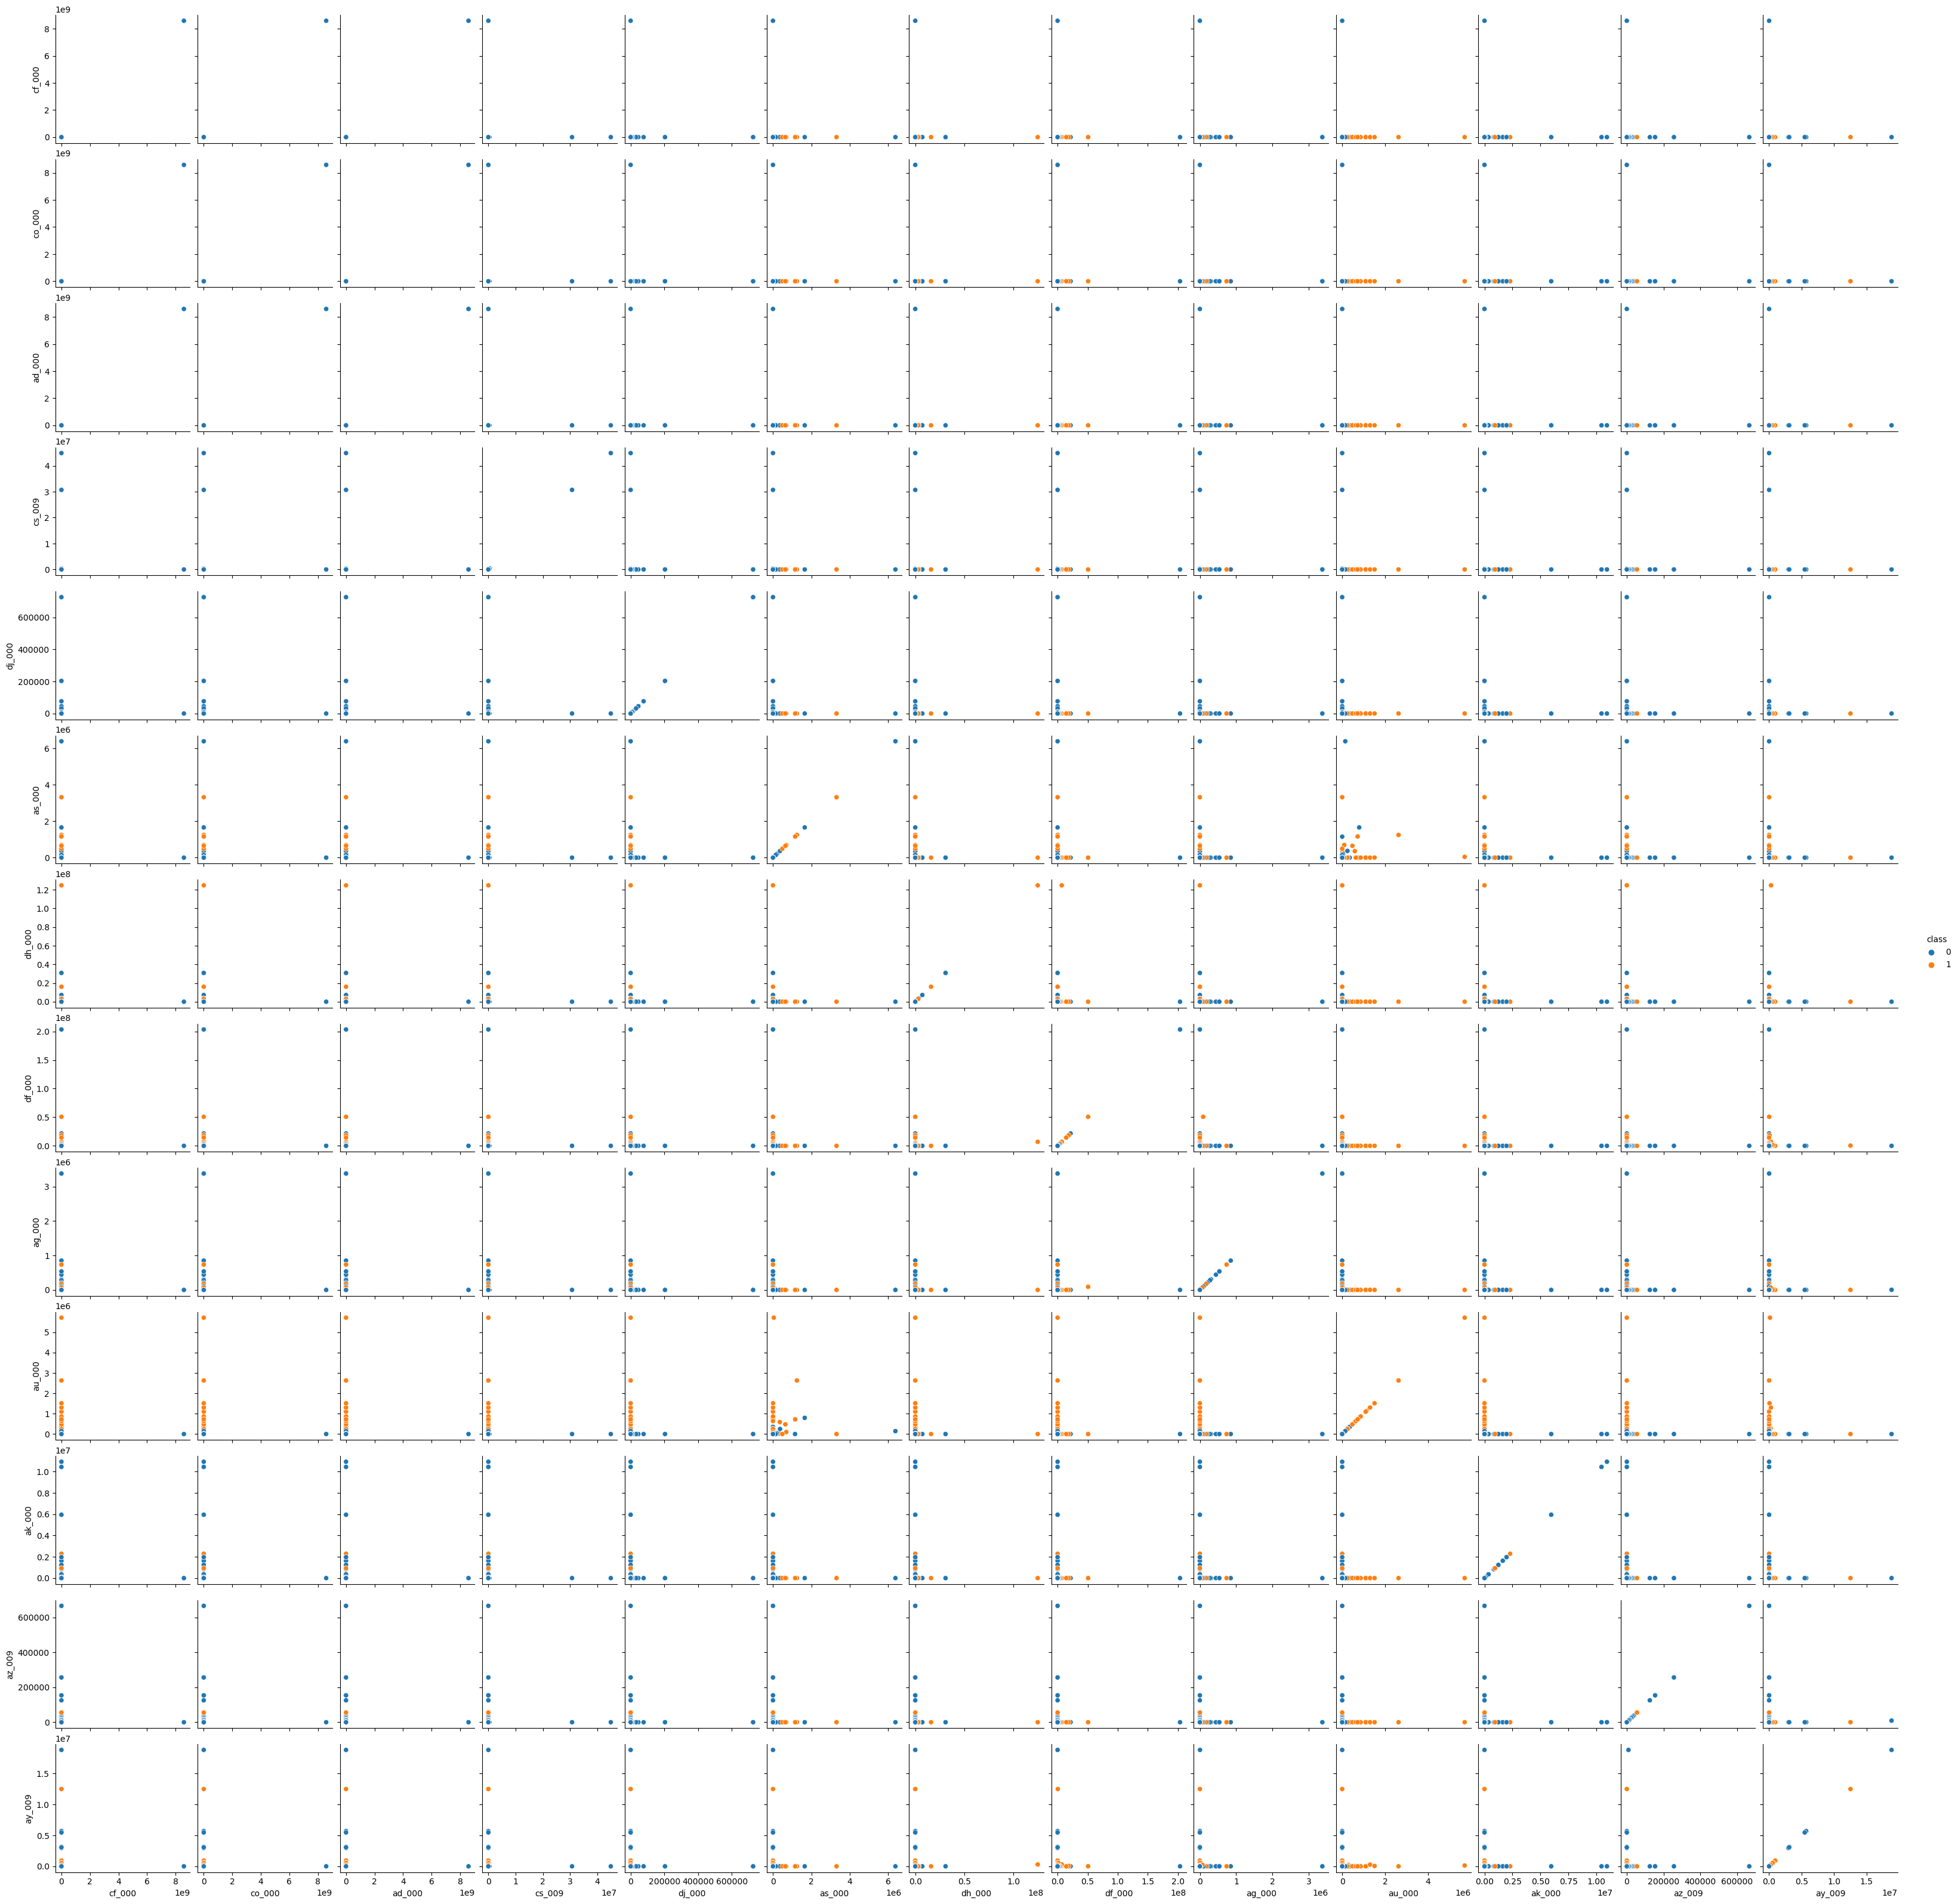

In [38]:
sns.pairplot(selected_plot_data,hue='class', diag_kind = None)

In Scatter Plot, we can see that classes are linearly seperable for some of these selected 13 features with highest CV

In [39]:
print(selected_dataset.dtypes)


cf_000    object
co_000    object
ad_000    object
cs_009    object
dj_000    object
as_000    object
dh_000    object
df_000    object
ag_000    object
au_000    object
ak_000    object
az_009    object
ay_009    object
dtype: object


In [40]:
selected_dataset = selected_dataset.apply(pd.to_numeric, errors='coerce')


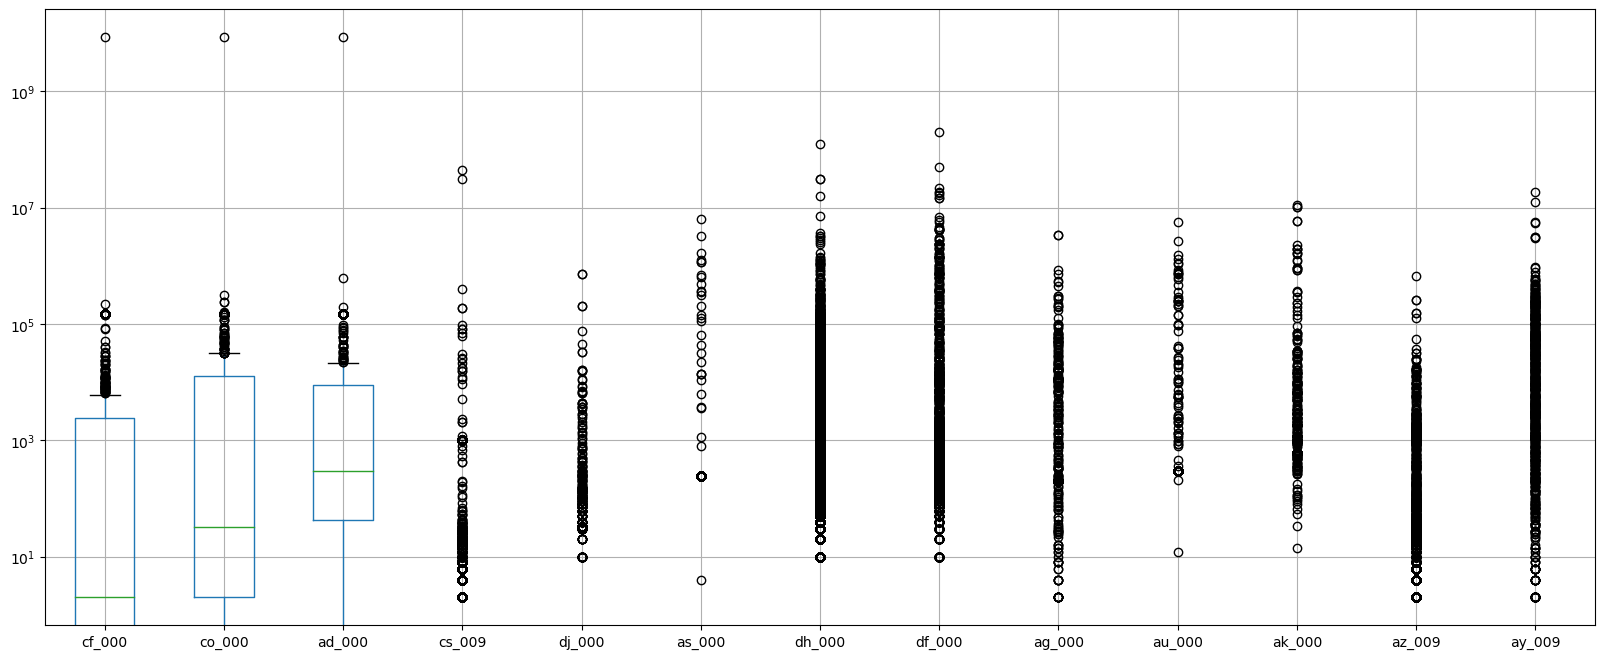

In [41]:
selected_dataset.boxplot(figsize=(20, 8))
plt.yscale('log')
plt.show()


Drawing significant conclusions about the importance of these features from scatter plots alone is not practical. Box plots, which employ a logarithmic scale for better clarity, offer improved comparisons, particularly when dealing with extensive datasets and multiple groups.

### v. Determine the number of positive and negative data. Is this data set imbal- anced?

In [42]:
full_dataset['class'].value_counts()

class
neg    74625
pos     1375
Name: count, dtype: int64

Here we can clearly determine that Number of Negative Data is very large than compared to the Number of Positive data, hence we can conclude that is a highly imbalanced dataset

### (c) Train a random forest to classify the data set

In [43]:
model = RandomForestClassifier(oob_score = True)
model = model.fit(imputed_aps_train_df_x, Train_data_Y)
y_predicted_test = model.predict(imputed_aps_test_df_x)
Test_Accuracy = accuracy_score(Test_data_Y, y_predicted_test)

In [44]:
Test_error=1-Test_Accuracy
Test_error = round(Test_error, 3)
print('TEST ERROR:', Test_error)

TEST ERROR: 0.008


In [45]:
oobError = 1-model.oob_score_
oobError = round(oobError, 3)
print('OUT OF BAG ERROR:', oobError)

OUT OF BAG ERROR: 0.006


In [46]:
Confusion_Matrix_Test = confusion_matrix(Test_data_Y,y_predicted_test)
TestTN, TestFP, TestFN, TestTP = Confusion_Matrix_Test.ravel()
print('Confusion matrix for test data-->'+'\n',Confusion_Matrix_Test)

Confusion matrix for test data-->
 [[15607    18]
 [  103   272]]


In [47]:
print('Misclassification for test data->',TestFP+TestFN)

Misclassification for test data-> 121


In [48]:
y_predicted_Train = model.predict(imputed_aps_train_df_x)
Train_Accuracy=accuracy_score(Train_data_Y, y_predicted_Train)
Train_Accuracy

0.9999833333333333

In [49]:
Confusion_Matrix_Train = confusion_matrix(Train_data_Y, y_predicted_Train)
TrainTN, TrainFP, TrainFN, TrainTP = Confusion_Matrix_Train.ravel()
print('Confusion matrix for train data-->'+'\n',Confusion_Matrix_Train)

Confusion matrix for train data-->
 [[59000     0]
 [    1   999]]


In [50]:
print('Misclassification for train data->>',TrainFP+TrainFN)

Misclassification for train data->> 1


AUC value for test data is->> 0.862


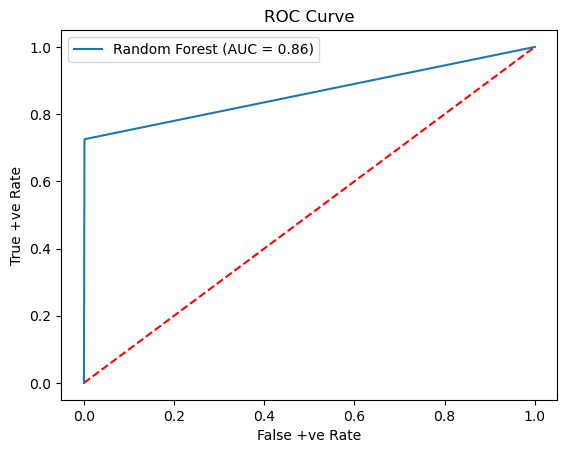

In [51]:
Test_FPR, Test_TPR, Test_Threshold = roc_curve(Test_data_Y, y_predicted_test)
Test_AUC = round(roc_auc_score(Test_data_Y, y_predicted_test), 3)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(Test_FPR, Test_TPR, label='Random Forest (AUC = %0.2f)' % Test_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for test data is->>',Test_AUC)

AUC value for test data is-> 1.0


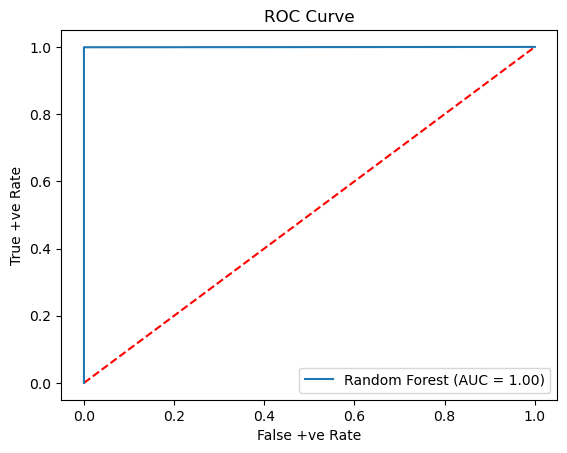

In [52]:
Train_FPR, Train_TPR, Train_Threshold = roc_curve(Train_data_Y, y_predicted_Train)
Train_AUC = round(roc_auc_score(Train_data_Y, y_predicted_Train), 3)
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(Test_FPR, Test_TPR, marker='.')
plt.plot(Train_FPR, Train_TPR, label='Random Forest (AUC = %0.2f)' % Train_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for test data is->',Train_AUC)

### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

There are two ways to handle this type of imbalance in random forest.

Using class_weight as balanced: In this method, we assign weights to the classes inversely proportional to their frequencies. Essentially, it means giving more weight to minority classes and less weight to majority classes during the training process. This helps in ensuring that the model gives equal importance to all classes regardless of their imbalance in the dataset. We have opted for this approach in our implementation.

Using Balanced Random Forest Classifier: This is a specialized version of the random forest algorithm specifically designed to handle imbalanced datasets. It works by resampling the training data during the construction of each decision tree in the forest. The resampling is done in a way that balances the class distribution, typically by either undersampling the majority class or oversampling the minority class. This results in a more balanced and robust model, particularly effective when dealing with severe class imbalances.

In [53]:
model_d = RandomForestClassifier(max_depth=5, random_state=7, n_jobs = -1,oob_score= True, class_weight = "balanced")
model_d = model_d.fit(imputed_aps_train_df_x, Train_data_Y)

In [54]:
y_predicted_test = model_d.predict(imputed_aps_test_df_x)
Test_Accuracy = accuracy_score(Test_data_Y, y_predicted_test)

#Calculating Test error
Test_error_balanced=1-Test_Accuracy
Test_error_balanced = round(Test_error_balanced, 3)
print('TEST ERROR:', Test_error_balanced)



# Calculation oob error
oobError_balanced = 1-model_d.oob_score_
oobError_balanced = round(oobError_balanced, 3)
print('OUT OF BAG ERROR:', oobError_balanced)






TEST ERROR: 0.039
OUT OF BAG ERROR: 0.041


In [55]:
Confusion_Matrix_Test = confusion_matrix(Test_data_Y,y_predicted_test)
TestTN, TestFP, TestFN, TestTP = Confusion_Matrix_Test.ravel()
print('Confusion matrix for test data->'+'\n',Confusion_Matrix_Test)

print('Misclassification for test data->',TestFP+TestFN)


y_predicted_Train = model_d.predict(imputed_aps_train_df_x)
Train_Accuracy_balanced=accuracy_score(Train_data_Y, y_predicted_Train)
Train_Accuracy_balanced

Confusion_Matrix_Train = confusion_matrix(Train_data_Y, y_predicted_Train)
TrainTN, TrainFP, TrainFN, TrainTP = Confusion_Matrix_Train.ravel()
print('Confusion matrix for train data->'+'\n',Confusion_Matrix_Train)

print('Misclassification for train data->',TrainFP+TrainFN)


Confusion matrix for test data->
 [[15021   604]
 [   14   361]]
Misclassification for test data-> 618
Confusion matrix for train data->
 [[56619  2381]
 [   29   971]]
Misclassification for train data-> 2410


AUC value for test data is->> 0.962


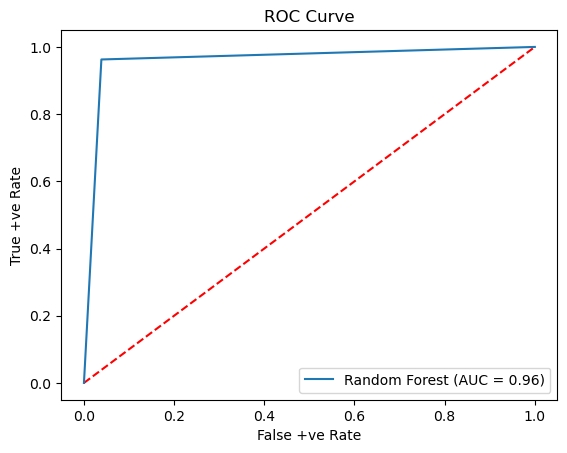

In [56]:
Test_FPR, Test_TPR, Test_Threshold = roc_curve(Test_data_Y, y_predicted_test)
Test_AUC = round(roc_auc_score(Test_data_Y, y_predicted_test), 3)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(Test_FPR, Test_TPR, label='Random Forest (AUC = %0.2f)' % Test_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for test data is->>',Test_AUC)


#ROC and AUC for test data.

AUC value for test data is->> 0.962


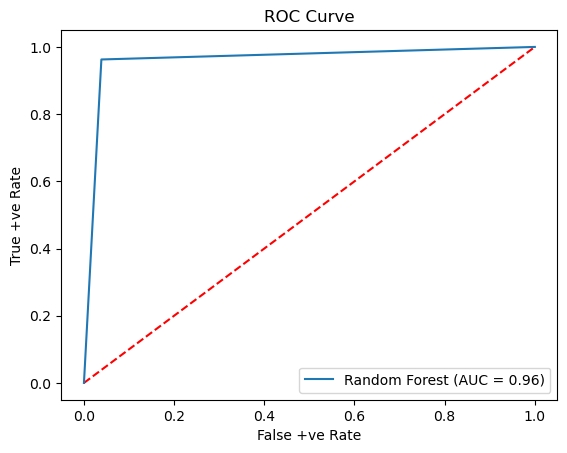

In [57]:
Test_FPR, Test_TPR, Test_Threshold = roc_curve(Test_data_Y, y_predicted_test)
Test_AUC = round(roc_auc_score(Test_data_Y, y_predicted_test), 3)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(Test_FPR, Test_TPR, label='Random Forest (AUC = %0.2f)' % Test_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for test data is->>',Test_AUC)


#ROC and AUC for test data.

AUC value for train data is->> 0.965


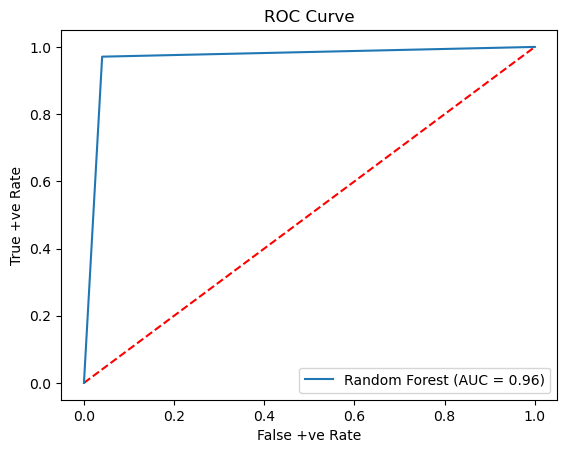

In [58]:
Train_FPR, Train_TPR, Train_Threshold = roc_curve(Train_data_Y, y_predicted_Train)
Train_AUC = round(roc_auc_score(Train_data_Y, y_predicted_Train), 3)
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(Test_FPR, Test_TPR, marker='.')
plt.plot(Train_FPR, Train_TPR, label='Random Forest (AUC = %0.2f)' % Train_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for train data is->>',Train_AUC)

In [59]:
list1=[]
l1=[]
l1.append(Test_error)
l1.append(Test_error_balanced)
l1.append(oobError)
l1.append(oobError_balanced)
list1.append(l1)

In [60]:
print(tabulate(list1,headers=['Test Error(RF)','Test Error(Balanced RF)','Oob error(RF)','Oob error(Balanced RF)']))


  Test Error(RF)    Test Error(Balanced RF)    Oob error(RF)    Oob error(Balanced RF)
----------------  -------------------------  ---------------  ------------------------
           0.008                      0.039            0.006                     0.041


Observation:
The dataset exhibits class imbalance, which could lead the model to prioritize predicting samples as negative ('neg') to achieve higher accuracy. Consequently, the unbalanced scenario displays better overall performance. Upon examining the confusion matrix, we observe that when the class weights are balanced, the model demonstrates significantly improved predictions for the positive class 'pos'.

### (e) XGBoost and Model Trees

In [61]:
alphas=[1e-4,1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]

xgbModel = xgb.XGBClassifier(objective="binary:logistic", use_label_encoder=False, eval_metric='logloss')
xgbParameters = {'reg_alpha': alphas}
xgbModelVal = GridSearchCV(xgbModel, xgbParameters, cv=5, error_score='raise')
xgbModelVal = xgbModelVal.fit(imputed_aps_train_df_x, Train_data_Y)

BestAlpha = xgbModelVal.best_params_['reg_alpha']
BestAlpha = round(BestAlpha, 3)

print('Best alpha is->>', BestAlpha)



Best alpha is->> 1


In [62]:

finalXGBModel = xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False, eval_metric='logloss',reg_alpha=BestAlpha)
finalXGBModel = finalXGBModel.fit(imputed_aps_train_df_x, Train_data_Y)

PredictedY = finalXGBModel.predict(imputed_aps_test_df_x)
xgboostMSE = mean_squared_error(Test_data_Y, PredictedY)
xgboostMSE = round(xgboostMSE, 3)

print('TEST MSE FOR XGBOOST REGRESSION is->>', xgboostMSE)

TEST MSE FOR XGBOOST REGRESSION is->> 0.006


In [63]:
Test_Accuracy = accuracy_score(Test_data_Y,PredictedY)
Test_error_xgb=1-Test_Accuracy
Test_error_xgb

0.006125000000000047

In [64]:
Confusion_Matrix_Test = confusion_matrix(Test_data_Y,PredictedY)
TestTN, TestFP, TestFN, TestTP = Confusion_Matrix_Test.ravel()
print('Confusion matrix for test data-->'+'\n',Confusion_Matrix_Test)

Confusion matrix for test data-->
 [[15609    16]
 [   82   293]]


In [65]:
PredictedY_train = finalXGBModel.predict(imputed_aps_train_df_x)
Confusion_Matrix_Train = confusion_matrix(Train_data_Y, PredictedY_train)
TrainTN, TrainFP, TrainFN, TrainTP = Confusion_Matrix_Train.ravel()
print('Confusion matrix for train data-->'+'\n',Confusion_Matrix_Train)

Confusion matrix for train data-->
 [[59000     0]
 [    1   999]]


In [66]:
Train_Accuracy = accuracy_score(Train_data_Y,PredictedY_train)
Train_error_XGB=1-Train_Accuracy
print('Train error for XG Boost',Train_error_XGB)

Train error for XG Boost 1.666666666666483e-05


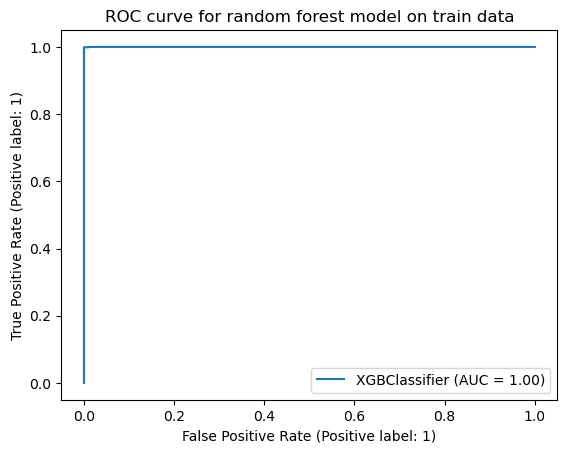

In [67]:
# plot_roc_curve(finalXGBModel, Train_data_X, Train_data_Y, name = 'XG Boost on testing data')
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_estimator(finalXGBModel,imputed_aps_train_df_x,Train_data_Y)
plt.title('ROC curve for random forest model on train data')
plt.show()

AUC value for train data is->> 1.0


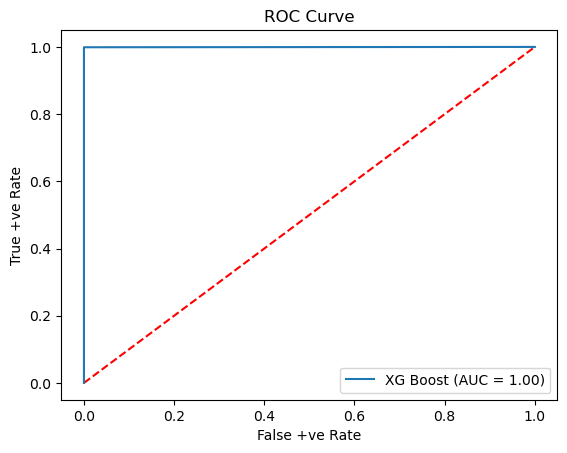

In [68]:
Train_FPR, Train_TPR, Train_Threshold = roc_curve(Train_data_Y, PredictedY_train)
Train_AUC = round(roc_auc_score(Train_data_Y, PredictedY_train), 3)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(Train_FPR, Train_TPR, label='XG Boost (AUC = %0.2f)' % Train_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for train data is->>',Train_AUC)

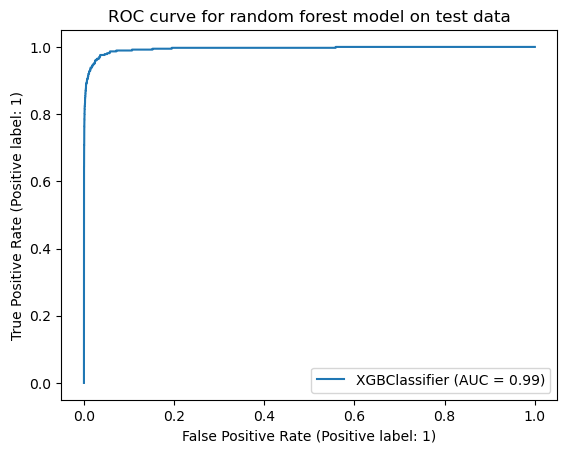

In [69]:
display = RocCurveDisplay.from_estimator(finalXGBModel,imputed_aps_test_df_x,Test_data_Y)
plt.title('ROC curve for random forest model on test data')
plt.show()

AUC value for train data is->> 0.89


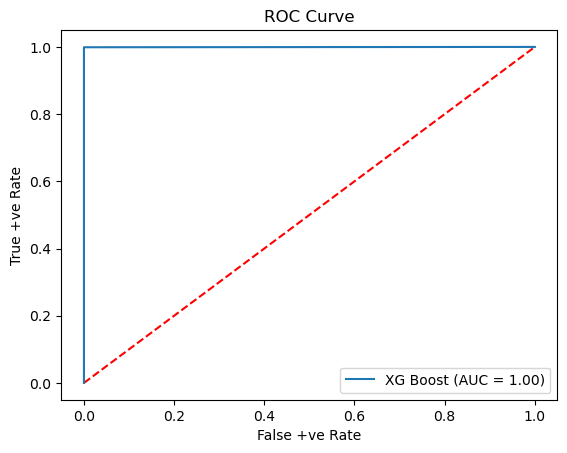

In [70]:
Test_FPR, Test_TPR, Test_Threshold = roc_curve(Test_data_Y, PredictedY)
Test_AUC = round(roc_auc_score(Test_data_Y, PredictedY), 3)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(Train_FPR, Train_TPR, label='XG Boost (AUC = %0.2f)' % Train_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for train data is->>',Test_AUC)

### (f). Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process yourdata to compensate for class imbalance

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
sm = SMOTE(random_state=42)

In [73]:
X_result, Y_result = sm.fit_resample(imputed_aps_train_df_x, Train_data_Y)

SMOTE should be performed inside the cross validation at every fold. This is the right way of performing cross validation

In [74]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)], ['classifier', xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False, eval_metric='logloss')]])
param_grid = {'classifier__reg_alpha':[1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3]}
xgbModelVal_smote = GridSearchCV(estimator=pipeline, param_grid = param_grid, cv=5)
xgbModelVal_smote = xgbModelVal_smote.fit(X_result, Y_result)

In [75]:
BestAlpha_smote = xgbModelVal_smote.best_params_['classifier__reg_alpha']
BestAlpha_smote = round(BestAlpha_smote, 3)

print('Best alpha is->>', BestAlpha_smote)

Best alpha is->> 0.1


In [76]:
finalXGBModel_smote = xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False, eval_metric='logloss',reg_alpha=BestAlpha_smote)
finalXGBModel_smote = finalXGBModel_smote.fit(X_result, Y_result)

PredictedY_smote = finalXGBModel_smote.predict(imputed_aps_test_df_x)
xgboostMSE_smote = mean_squared_error(Test_data_Y, PredictedY_smote)
xgboostMSE_smote = round(xgboostMSE_smote, 3)

print('TEST MSE FOR XGBOOST REGRESSION is->>', xgboostMSE_smote)

TEST MSE FOR XGBOOST REGRESSION is->> 0.017


In [77]:
Confusion_Matrix_Test_smote = confusion_matrix(Test_data_Y,PredictedY_smote)
TestTN, TestFP, TestFN, TestTP = Confusion_Matrix_Test_smote.ravel()
print('Confusion matrix for test data-->'+'\n',Confusion_Matrix_Test_smote)

Confusion matrix for test data-->
 [[15395   230]
 [   49   326]]


In [78]:
PredictedY_train_smote = finalXGBModel_smote.predict(X_result)
Confusion_Matrix_Train_smote = confusion_matrix(Y_result, PredictedY_train_smote)
TrainTN, TrainFP, TrainFN, TrainTP = Confusion_Matrix_Train_smote.ravel()
print('Confusion matrix for train data-->'+'\n',Confusion_Matrix_Train_smote)

Confusion matrix for train data-->
 [[59000     0]
 [    1 58999]]


In [79]:
Train_Accuracy_sm = accuracy_score(Y_result,PredictedY_train_smote)
Train_error_XGB_sm=1-Train_Accuracy_sm
print('Train error for XG Boost',Train_error_XGB_sm)

Train error for XG Boost 8.47457627117798e-06


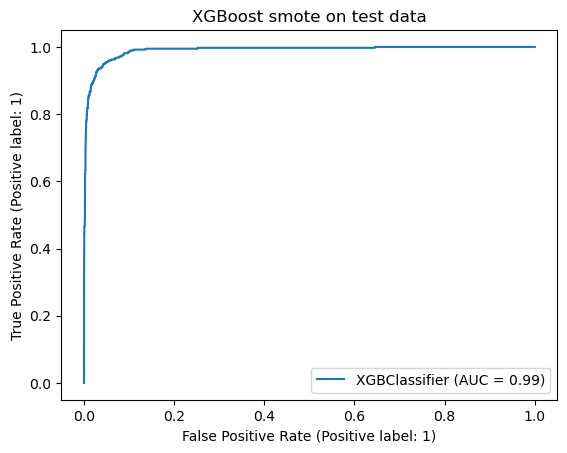

In [80]:
# plot_roc_curve(finalXGBModel_smote, Test_data_X, Test_data_Y, name = 'XG Boost on testing data')
display = RocCurveDisplay.from_estimator(finalXGBModel_smote,imputed_aps_test_df_x,Test_data_Y)
plt.title('XGBoost smote on test data')
plt.show()

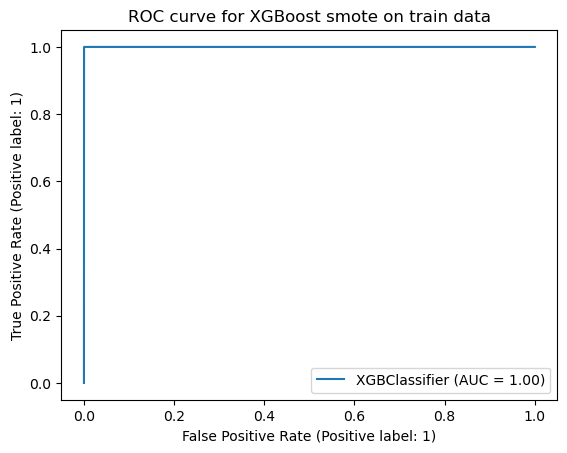

In [81]:
# plot_roc_curve(finalXGBModel_smote, Train_data_X, Train_data_Y, name = 'XG Boost on testing data')
display = RocCurveDisplay.from_estimator(finalXGBModel_smote,imputed_aps_train_df_x,Train_data_Y)
plt.title('ROC curve for XGBoost smote on train data')
plt.show()


Here, after using smote our test error increased a little but it seems acceptable as we are synthetically adding more data to increase our positive class to make it more balanced. Now, this classifier is better predictor as it is getting trained on a much more balanced dataset.

## 2. ISLR 6.6.3

(a) Steadily Decrease: The value of the estimated coefficients will go from 0 to their OLS value when the value of s increases. This is the reason that training RSS will decrease steadily.

(b) Decrease Initially and then eventually starts increasing in a new shape. The test RSS will decrease to a certain level after which it will hit an inflection point and the test residual sum error will start to increase.

(c) Steadily Increases: Beta is almost zero in the beginning which would mean that there is almost no variance in the beginning. It is only after the module becomes flexible does the variance start to go up.

(d) Steadily Decrease: Due to the bias-variance trade-off, since the variance is increasing, the bias will decrease.

(e) Irreducible error is act of god and is present in any machine learning model that is built and hence it will remain constant.

## 3. ISLR 6.6.5

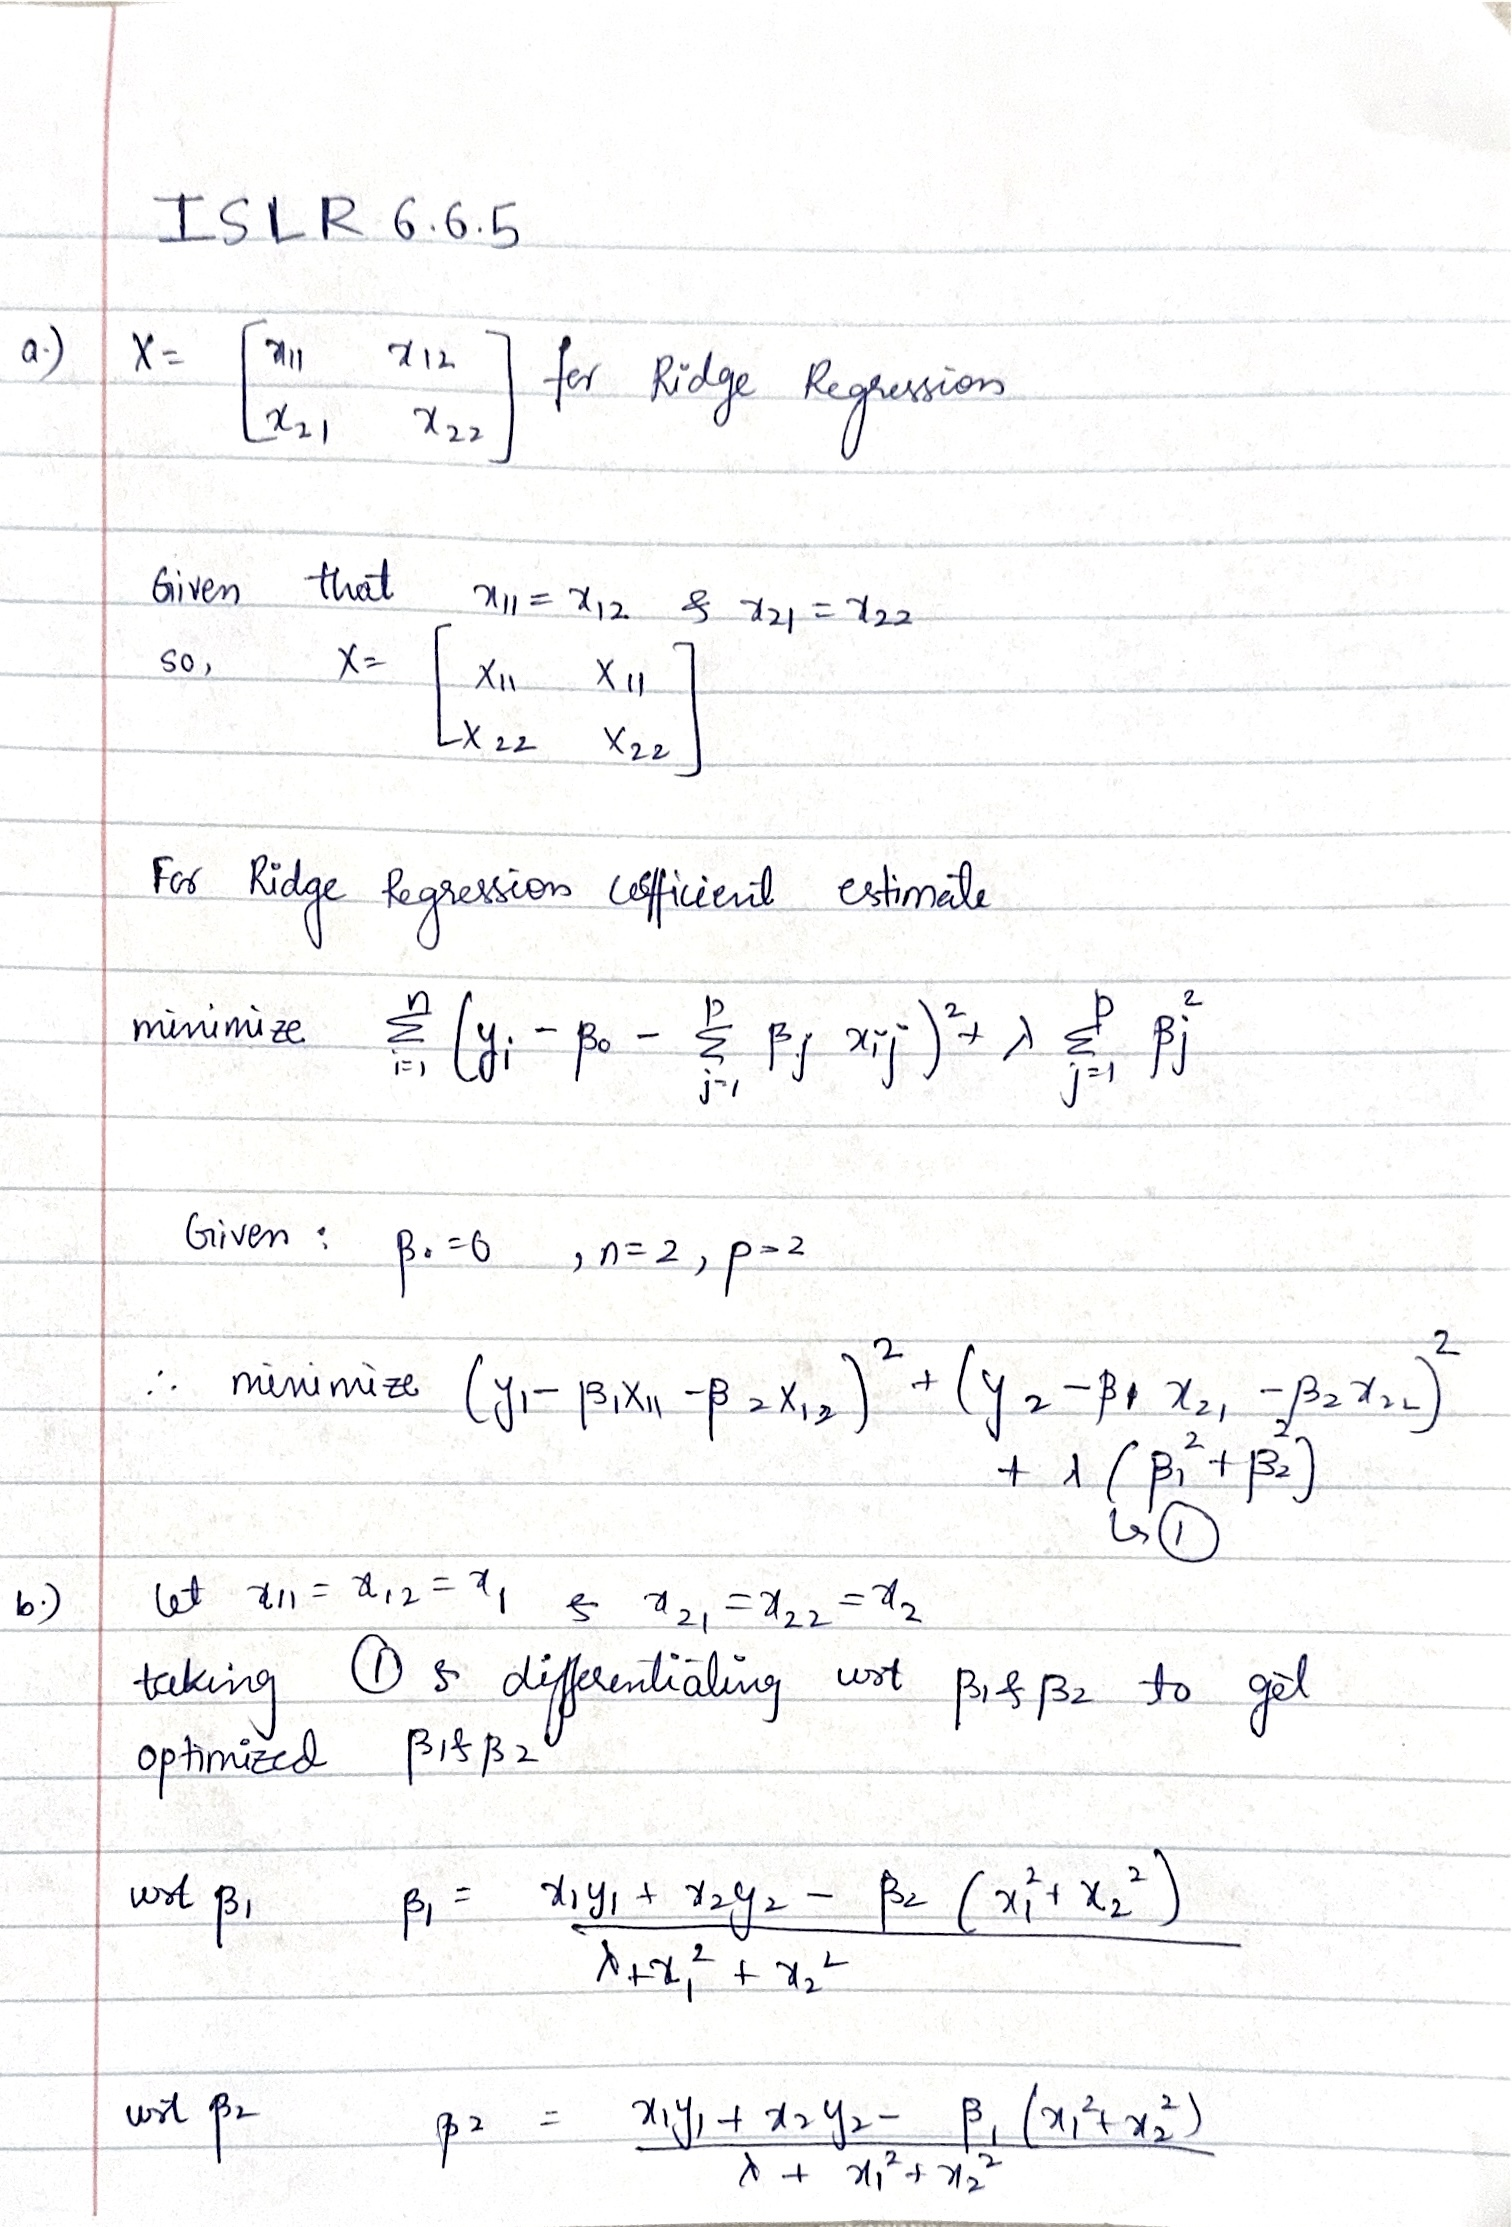

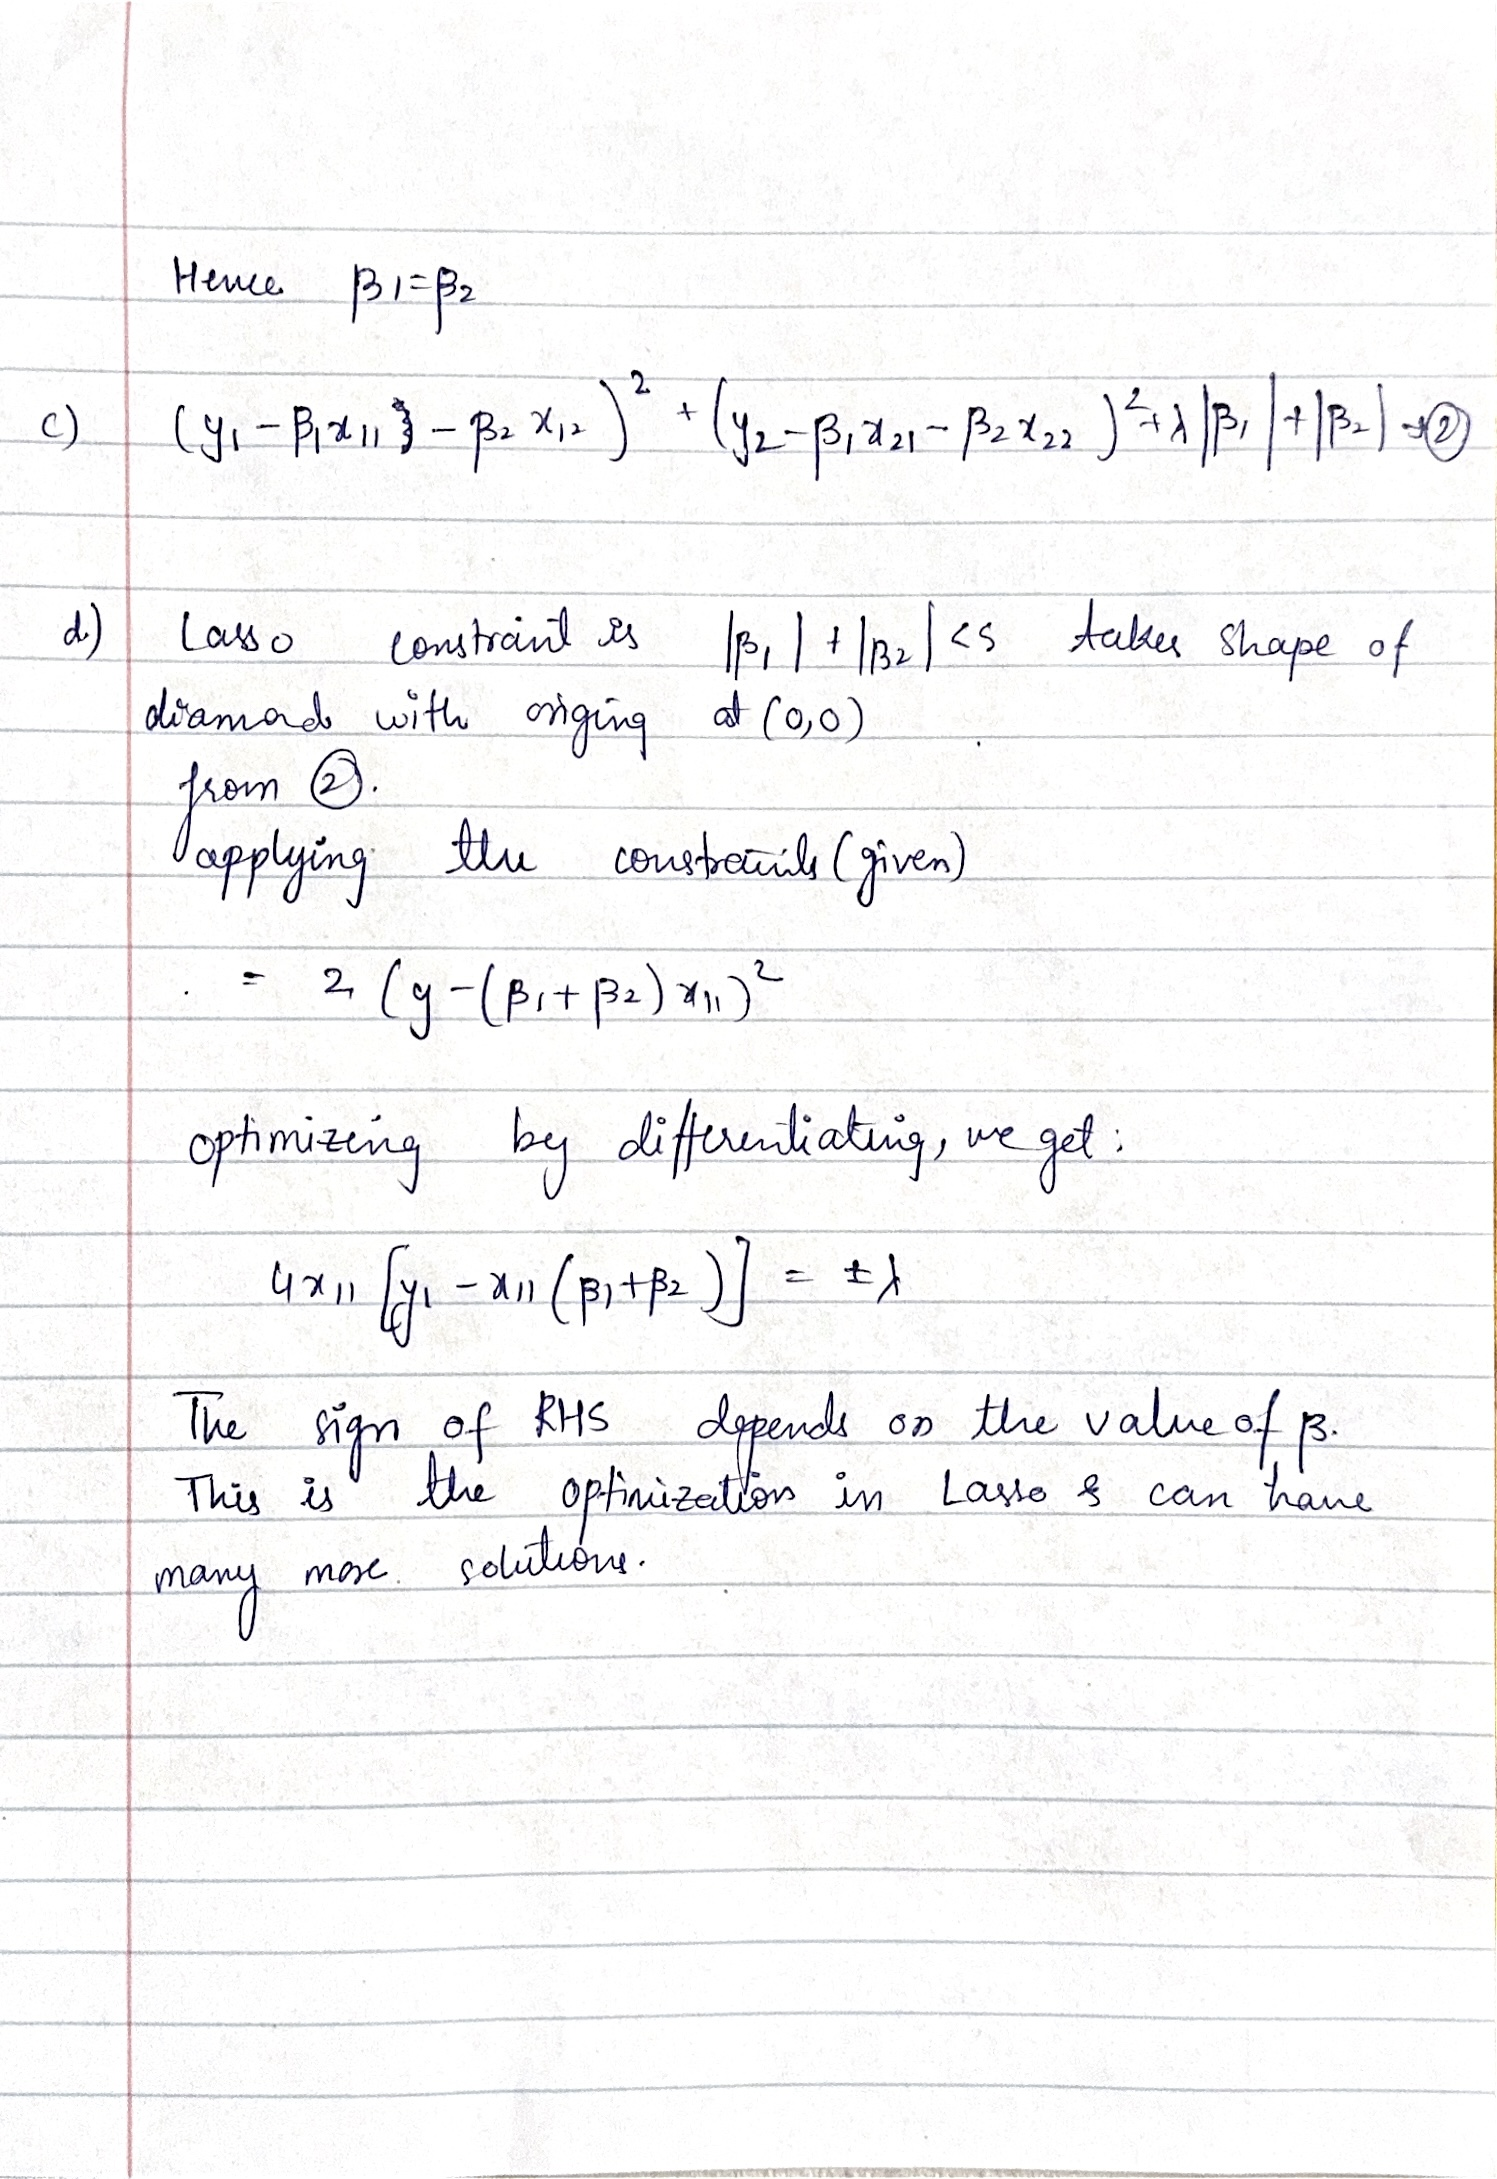

## 4. ISLR 8.4.5

Majority Polling: In this where probabilities >= 0.5 will be true and the classification will be false otherwise.

False = 4 and True = 6 and hence, the red samples are larger than green samples and so the classification will be red class.

Average Probability: Mean for given probabilities = 0.45 hence the final prediction is green.

## 5. ISLR 9.7.3

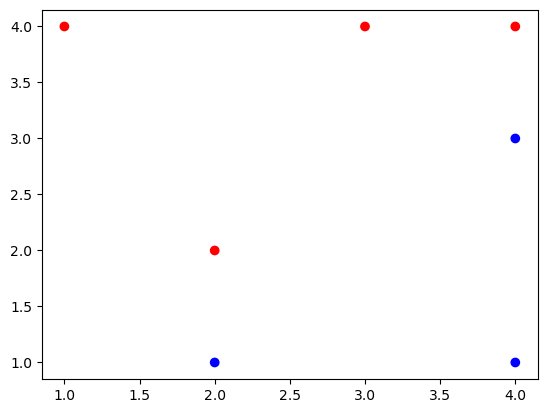

In [82]:
import matplotlib.pyplot as plt
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']
plt.figure()
plt.scatter(x1, x2, c = y)
plt.show()

(a)

(b) As shown in the graph, the best separating hyperplane is found between (2,1) and (2,2), as well as between (4,3) and (4,4).(4,4). The following is the result: x1-x2-0.5=0

(c) If x1-x2-0.5=0, classify as Red; if x1-x2-0.5 >= 0, classify as Blue.
The parameters are as follows:  
$\beta_0 = 1$, $\beta_1 = -1$ and $\beta_2 = 2$  
$\beta_0 + \beta_1X_1 + \beta_2X_2 > 0$ => red, otherwise, blue

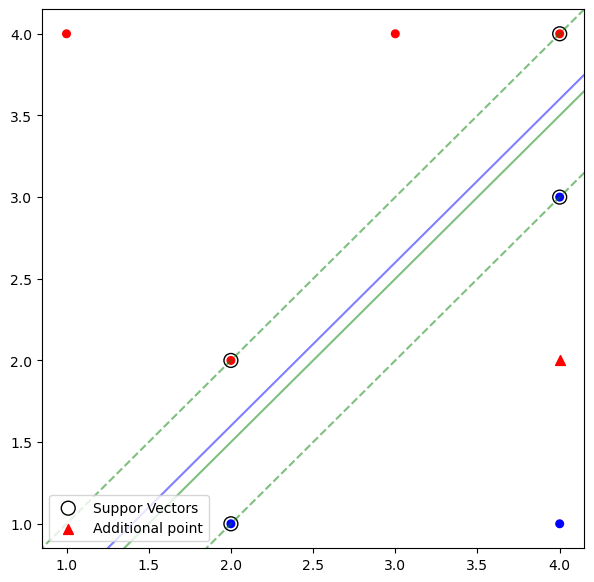

[0.99970703] [[-1.99941406  1.99941406]]


In [83]:
from sklearn.svm import SVC

given_dict = {'X1' : [3, 2, 4, 1, 2, 4, 4], 'X2' : [4, 2, 4, 4, 1, 3, 1],
           'Y' : ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']}
given_df = pd.DataFrame.from_dict(given_dict)

svc= SVC(kernel='linear', C=10000)
svc.fit(given_df.iloc[:, :-1], given_df.iloc[:, -1])

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(given_df.iloc[:, 0], given_df.iloc[:, 1],
           c=given_df.iloc[:, -1], s=30,
           cmap=plt.cm.Paired)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = svc.decision_function(xy).reshape(XX.shape)


lines1 = ax.contour(XX, YY, Z, colors='green', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], label="Decision Boundary")


ax.scatter(svc.support_vectors_[:, 0],svc.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='black', label="Suppor Vectors")


lines2 = ax.contour(XX, YY, Z - 0.2, colors='blue', levels=[0], alpha=0.5,
           linestyles=['-'])

ax.scatter([4.0], [2.0], color='red', marker='^', s=50, label="Additional point")

ax.legend()
plt.show()

print(svc.intercept_, svc.coef_)

(d) The maximal margin hyperplane is the solid green line, and the margin is the distance from the solid line to either of the dashed lines. The green dashed lines indicate maximal margin. The margin is here equal to 1/4.


(e) The support vectors are points(2,1),(2,2),(4,3) and (4,4)

(f) By looking at the graph, a slight movement of the point(4,1) would not change the maximal margin hyperplane.

(g) For example, the hyperplane (Blue line) whose equation is X1−X2−0.3=0 is not the optimal separating hyperplane.


(h) When the new point marked as red triangle (4,2) is added to the plot, the two classes are not separable by a hyperplane anymore. This makes linearly inseparable.
